In [1]:
import numpy as np           
import pandas as pd     
import matplotlib.pyplot as plt             
import seaborn as sns
from sklearn.model_selection import train_test_split


In [98]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

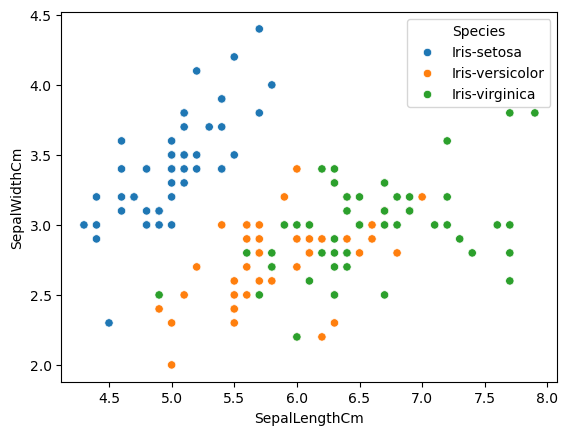

In [99]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)

In [100]:
data['is_setosa'] = np.where(data['Species'] == 'Iris-setosa', 1, 0)
data=data.drop(columns=['Id', 'Species','PetalLengthCm','PetalWidthCm'], axis=1)   # Id is not effect on the linear boundary
data

,SepalLengthCm,SepalWidthCm,is_setosa
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


In [101]:
data['is_setosa'].value_counts()

is_setosa
0    100
1     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

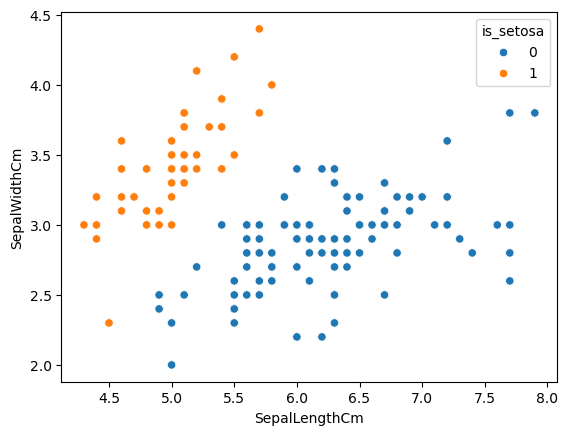

In [102]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='is_setosa', data=data)

In [103]:
class perceptron:

    def __init__(self, epochs, alpha):
        self.epochs=epochs
        self.alpha=alpha
        self.weight=None
    def activation_function(self, x):
        return np.where(x>=0, 1,0)
    
    def fit(self, x, y):
        sample, features= x.shape
        self.weight=np.zeros((features+1,1))
        x = np.hstack((np.ones((sample, 1)), x))

        for _ in range(self.epochs):
            for index, x_i in enumerate(x):

                linear_ouptput= np.dot(x_i, self.weight)
                y_pred= self.activation_function(linear_ouptput)
                error=y_pred-y[index]
                self.weight-=self.alpha*(error)*x_i.reshape(-1,1)

    def predict(self, x):
        sample, features=x.shape
        x=np.hstack((np.ones((sample,1)),x))
        linear_output=np.dot(x, self.weight)
        y_pred=self.activation_function(linear_output)
        return y_pred            

In [104]:
x=data.iloc[:, :-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train, x_test, y_train, y_test= train_test_split(x,y , test_size=0.2, random_state=42)

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [124]:
from sklearn.linear_model import Perceptron
model_build_in = Perceptron()
model_build_in.fit(x_train_scaled, y_train.flatten())
accuracy = model_build_in.score(x_test_scaled, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [117]:
model=perceptron(epochs=10, alpha=0.01)
model.fit(x_train, y_train)


In [119]:
y_pred=model.predict(x_test)
print("Accuracy :", np.mean(y_pred==y_test))

Accuracy : 1.0


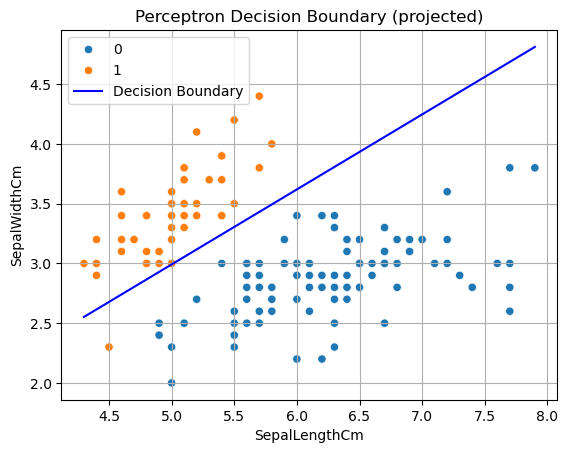

In [120]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='is_setosa', data=data)
theta = model.weight.flatten()



x_vals = np.linspace(data['SepalLengthCm'].min(), data['SepalLengthCm'].max(), 100)

y_vals = -(theta[0] + theta[1]*x_vals )/theta[2]

plt.plot(x_vals, y_vals, color='blue', label='Decision Boundary')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Perceptron Decision Boundary (projected)')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
weight=model.weight
weight

array([[ 0.94 ],
       [-0.563],
       [ 0.693]])